<a href="https://colab.research.google.com/github/mithamokelvinm/linear_regression_with_tf.keras/blob/main/Linear_Regression_with_tf_keras_and_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import relevant modules

In [3]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Define functions that build and train a model

The following code defines two functions:


*   `build_model(my_learning_rate)` - builds an empty model
*   `train_model(model, feature, label, epochs)` - trains the model from examples
 
  

In [4]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential
  # A sequential model contains one or more layers
  model = tf.keras.models.Sequential()


  # Describe the topography of the model
  # The topography of a simple linear regression model is a 
  # single node in a single layer
  model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))


  # Compile the model topography into code that TensorFlow can
  # efficiently execute. Configure training to minimize the model's
  # mean squared error
  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate),
                loss = "mean_squared_error", metrics = 
                [tf.keras.metrics.RootMeanSquaredError()])
  
  return model



def train_model(model, feature, label, epochs, batch_size):
  """ Train the model by feeding it data. """

  # Feed the future values and label values to the model
  # The model will train for a specific number of epochs,
  # gradually learning how the feature values relate to
  # the label values
  history = model.fit(x = feature, y = label, batch_size = batch_size, 
                      epochs = epochs)
  

  # The list of epochs is stored separately from the rest of the history
  epochs = history.epoch
  

  # Gather the trained model's weight and bias
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  
  # Gather the history (a snapshot) of each epoch
  hist = pd.DataFrame(history.history)


  # Specifically gather the model's root mean squared error
  # at each epoch
  rmse = hist["root_mean_squared_error"]


  return trained_weight, trained_bias, epochs, rmse


print("Defined build_model and trained_model functions")

Defined build_model and trained_model functions


# Define plotting functions

Here we'll use matplotlib to create the following two plots:
* A plot of feature values vs label values, and a line showing the 
output of the  model
* A loss curve

In [5]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model aganist the trained feature and label."""

  # Label the axes
  plt.xlabel("feature")
  plt.ylabel("label")


  # Plot the feature values vs. label values
  plt.scatter(feature, label)


  # Create a red line representing the model. This red line starts at 
  # coordinates (x0, y0) and ends at coordinates (x1, y1)
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c = 'r')


  # Render the scatter plot and the red line
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epochs."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")


  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()


print("Defined the plot_the_model and plot_the loss_curve_functions")


Defined the plot_the_model and plot_the loss_curve_functions


# Define the DataSet
We'll use a dataset consisting of 12 examples.
Each example will consist of one feature and one label.


In [6]:
# Define features and labels
my_feature = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# Specify the hyperparameters
The hyperparameters in this Colab are as follows:
* learning rate
* epochs
* batch_size

The following code cell initializes these hyperparameters and then invokes the fuctions that build and train the model

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 1s 771ms/step - loss: 343.6161 - root_mean_squared_error: 18.5369
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 334.0171 - root_mean_squared_error: 18.2761
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 327.1848 - root_mean_squared_error: 18.0883
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 321.5415 - root_mean_squared_error: 17.9316
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 316.5886 - root_mean_squared_error: 17.7929
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 312.0950 - root_mean_squared_error: 17.6662
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 307.9324 - root_mean_squared_error: 17.5480
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 304.0209 - root_mean_squared_error: 17.4362
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 300.3073 

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


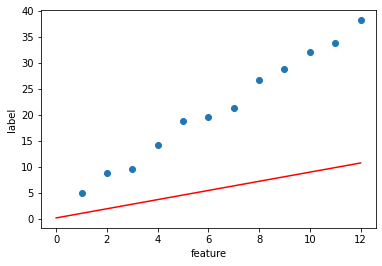

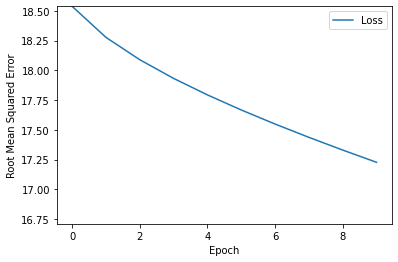

In [7]:
# Initializing hyperparameters
learning_rate = 0.01
epochs = 10
my_batch_size = 12


# Invoking the functions that build and train the model
my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)


# Invoking the plot functions
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The above hyperparameters did not result to flattening of the curve. If the curve doesn't flatten out the model hasen't trained suffieciently. We'll need to tune the hyperparameters further.

# Defining a function to tune the hyperparameters
The function below takes the learning_rate, batch_size, and epochs as input and plots the model and the loss curve.
Adjust the hyperparameters when invoking the function until you have an ideal set of hyperparameters that results to a well trained model.

In [8]:
# Defining a function to tune hyperparameters
def tune_hyperparameters(l_rate, ep, b_size ):

  # Initializing the hyperparameters
  learning_rate = l_rate
  epochs = ep
  my_batch_size = b_size
  

  # Invoking the build_model and train_model functions
  my_model = build_model(learning_rate)
  trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                           my_label, epochs,
                                                           my_batch_size)
  

  # Invoking the plotting functions
  plot_the_model(trained_weight, trained_bias, my_feature, my_label)
  plot_the_loss_curve(epochs, rmse)
  

# Invoke the `tune_hyperparameters(l_rate, ep, b_size)` to tune the hyperparameters

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 314ms/step - loss: 918.2833 - root_mean_squared_error: 30.3032
Epoch 2/70
1/1 [==============================] - 0s 10ms/step - loss: 710.2784 - root_mean_squared_error: 26.6510
Epoch 3/70
1/1 [==============================] - 0s 9ms/step - loss: 584.1384 - root_mean_squared_error: 24.1690
Epoch 4/70
1/1 [==============================] - 0s 9ms/step - loss: 491.9583 - root_mean_squared_error: 22.1801
Epoch 5/70
1/1 [==============================] - 0s 12ms/step - loss: 419.3819 - root_mean_squared_error: 20.4788
Epoch 6/70
1/1 [==============================] - 0s 10ms/step - loss: 359.9227 - root_mean_squared_error: 18.9716
Epoch 7/70
1/1 [==============================] - 0s 10ms/step - loss: 310.0205 - root_mean_squared_error: 17.6074
Epoch 8/70
1/1 [==============================] - 0s 11ms/step - loss: 267.4789 - root_mean_squared_error: 16.3548
Epoch 9/70
1/1 [==============================] - 0s 11ms/step - loss: 230.8313 - root_mean_

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


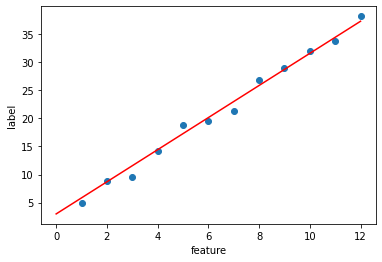

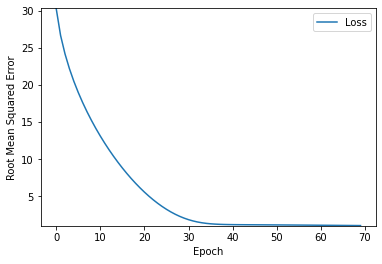

In [9]:
tune_hyperparameters(0.14, 70, 12)